In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%load_ext lab_black

In [16]:
# plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (10, 7)

## Load Dataset and initial exploration

In [10]:
df = pd.read_csv("train.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets create a suport function to enhance our visuals

In [57]:
def color_map(feature):
    # Colours - Choose the extreme colours of the colour map
    colours = ["#bbdefb", "#2196f3"]
    max_value = feature.max()
    min_value = feature.min()
    cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
    norm = mpl.colors.Normalize(min_value, max_value)
    return cmap, norm

Text(0.5, 1.0, 'Male vs female on board')

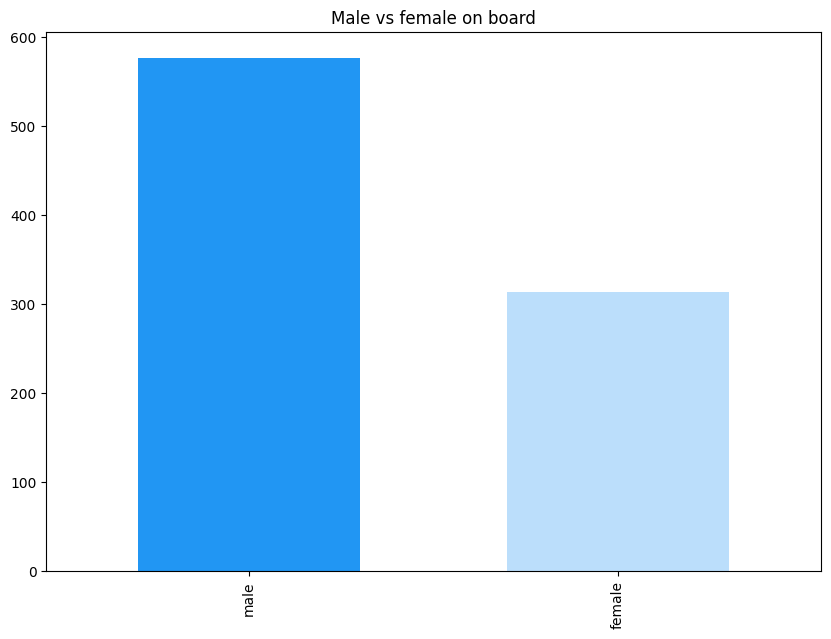

In [58]:
sex_group = df.groupby("Sex").size()
cmap, norm = color_map(sex_group)
df["Sex"].value_counts().plot(
    kind="bar", color=cmap(norm(df["Sex"].value_counts())), width=0.6, zorder=2
)
plt.title("Male vs female on board")

In [59]:
def catgegorize_age(age):
    if age < 10:
        return 0
    if age < 10:
        return 0
    if 18 < age < 65:
        return "adult"
    else:
        return "elder"

In [60]:
df["age_category"] = np.where(
    df["Age"] < 18, "Child", np.where(df["Age"] > 65, "Elder", "Adult")
)

Let´s check out the age distribution

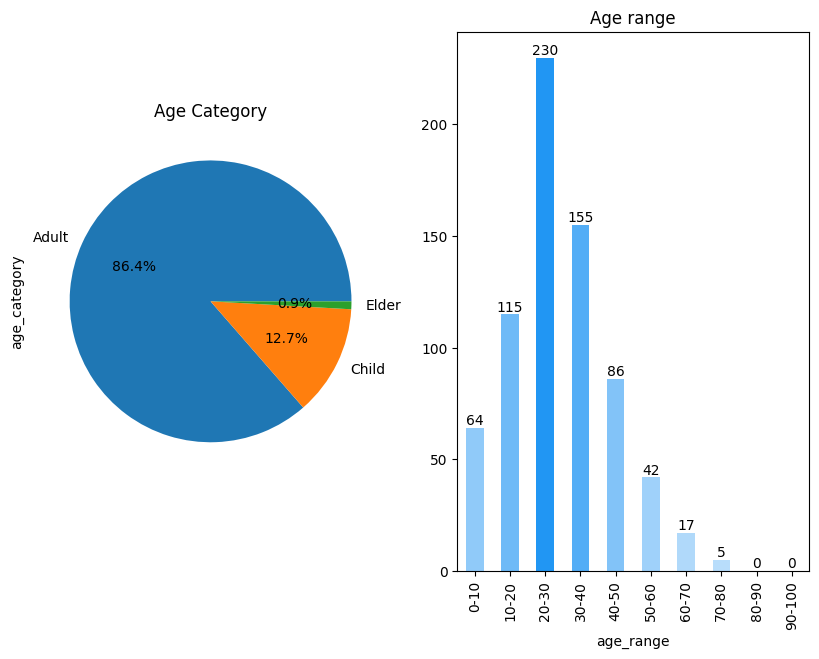

In [65]:
# Elderly >65
# Child < 18
fig, ax = plt.subplots(1, 2)

df["age_category"].value_counts().plot(
    kind="pie",
    title="Age Category",
    ax=ax[0],
    autopct="%.1f%%",
)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df["age_range"] = pd.cut(
    df["Age"],
    age_bins,
    labels=[
        "0-10",
        "10-20",
        "20-30",
        "30-40",
        "40-50",
        "50-60",
        "60-70",
        "70-80",
        "80-90",
        "90-100",
    ],
)

grouped_ages = df.groupby("age_range").size()
cmap, norm = color_map(grouped_ages)
p1 = grouped_ages.plot(
    kind="bar", ax=ax[1], color=cmap(norm(grouped_ages)), title="Age range"
)
p1.bar_label(p1.containers[0])
plt.show()

### Survival

In [76]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, '')

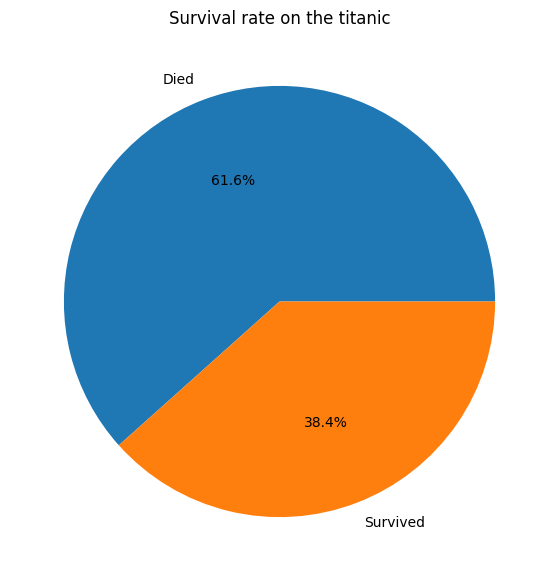

In [74]:
df["Survived"].value_counts().plot(
    kind="pie",
    labels=["Died", "Survived"],
    autopct="%.1f%%",
    title="Survival rate on the titanic",
)
plt.ylabel("")

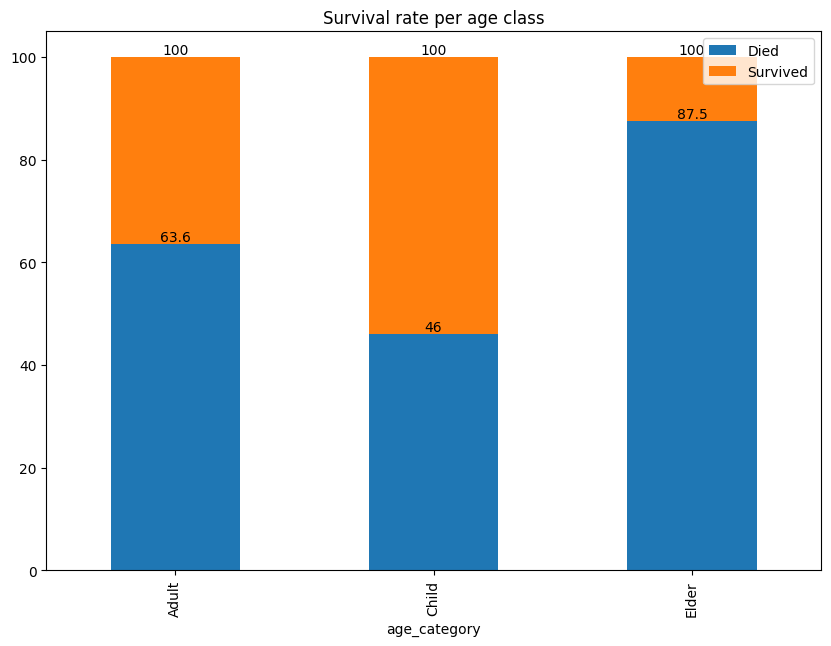

In [107]:
fig, ax = plt.subplots(1, 1)
survivors_age_cat = (
    df.groupby("age_category")["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_cat.plot.bar(stacked=True, ax=ax)
plt.legend(labels=["Died", "Survived"])
plt.title("Survival rate per age class")
for containers in ax.containers:
    plt.bar_label(containers)

plt.show()

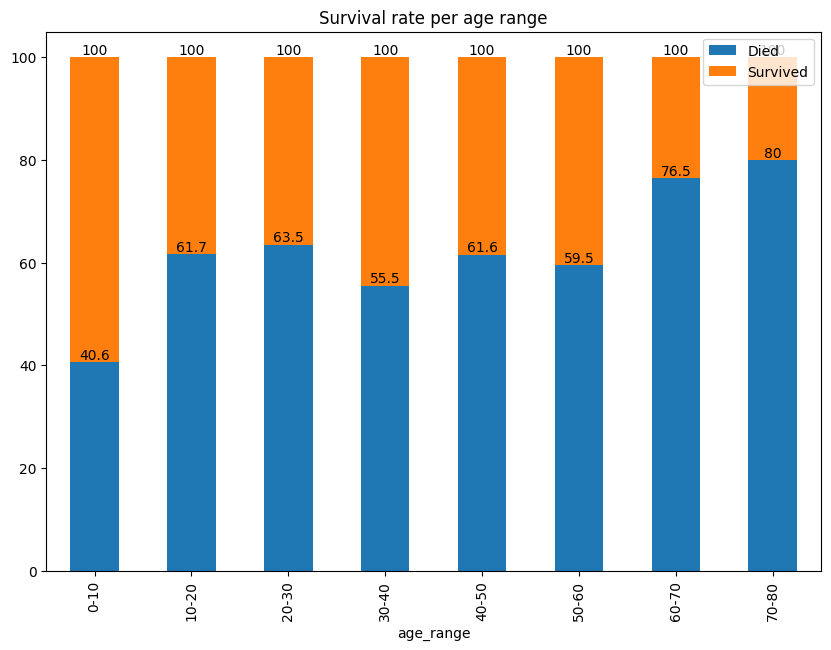

In [106]:
survivors_age_range = (
    df.groupby("age_range", observed=True)["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)
fig, ax = plt.subplots(1, 1)
survivors_age_range.plot.bar(stacked=True, ax=ax)
plt.legend(labels=["Died", "Survived"], loc="best")
plt.title("Survival rate per age range")
for containers in ax.containers:
    plt.bar_label(containers)

plt.show()

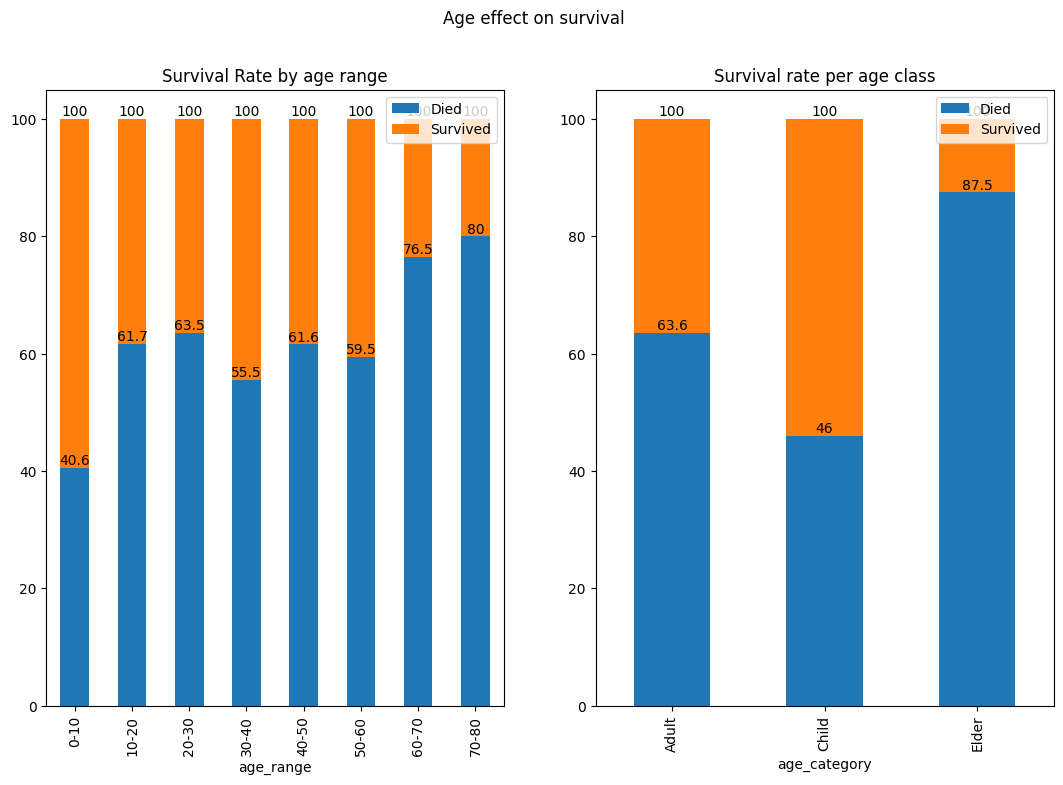

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(13, 8))

survivors_age_range = (
    df.groupby("age_range", observed=True)["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_range.plot.bar(stacked=True, ax=ax[0], title="Survival Rate by age range")
ax[0].legend(labels=["Died", "Survived"], loc="best")
for containers in ax[0].containers:
    ax[0].bar_label(containers)

survivors_age_cat = (
    df.groupby("age_category")["Survived"]
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

survivors_age_cat.plot.bar(stacked=True, ax=ax[1], title="Survival rate per age class")
ax[1].legend(labels=["Died", "Survived"])
for containers in ax[1].containers:
    ax[1].bar_label(containers)
plt.suptitle("Age effect on survival")
plt.show()